In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px


# Part A

In [2]:
df = pd.read_csv('weather.csv')
print(df.shape)
df.head()

(26298, 4)


,time,longitude,latitude,Ktemp
0,1950-01-01 9:00:00,286,40.75,274.39734
1,1950-01-02 9:00:00,286,40.75,277.07593
2,1950-01-03 9:00:00,286,40.75,280.80090
3,1950-01-04 9:00:00,286,40.75,287.14010
4,1950-01-05 9:00:00,286,40.75,285.65262


In [3]:
df['Ftemp'] = (df['Ktemp'] - 273.15) * (9/5) + 32

In [4]:
df['time'] = pd.to_datetime(df['time'])
df.head()

,time,longitude,latitude,Ktemp,Ftemp
0,1950-01-01 09:00:00,286,40.75,274.39734,34.245212
1,1950-01-02 09:00:00,286,40.75,277.07593,39.066674
2,1950-01-03 09:00:00,286,40.75,280.80090,45.771620
3,1950-01-04 09:00:00,286,40.75,287.14010,57.182180
4,1950-01-05 09:00:00,286,40.75,285.65262,54.504716


In [5]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

monthly_avg = df.groupby(['year', 'month'])['Ftemp'].mean().reset_index()
monthly_avg

,year,month,Ftemp
0,1950,1,39.994274
1,1950,2,31.838770
2,1950,3,35.444411
3,1950,4,47.381065
4,1950,5,57.668071
...,...,...,...
859,2021,8,76.812806
860,2021,9,70.573598
861,2021,10,61.972971
862,2021,11,45.969692


In [6]:
years = monthly_avg['year'].unique()
fig = go.Figure()

for year in years:
    filtered_df = monthly_avg[monthly_avg['year'] == year]
    fig.add_trace(
        go.Scatter(
            x=filtered_df['month'],
            y=filtered_df['Ftemp'],
            mode='lines+markers',
            name=str(year)
        )
    )

sliders = [{
    'steps': [
        {
            'method': 'update',
            'label': str(year),
            'args': [{'visible': [year == y for y in years]},
                     {'title': f'Average Monthly Temperature in {year}'}],
        } for year in years
    ],
    'currentvalue': {'prefix': 'Year: '}
}]

fig.update_layout(
    sliders=sliders,
    title='Average Monthly Temperature',
    xaxis_title='Month',
    yaxis_title='Temperature (Fahrenheit)',
    xaxis=dict(tickmode='array', tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
)

fig.show()


In [7]:
import plotly.offline as py_offline

# Assuming `fig` is your Plotly figure
py_offline.plot(fig, filename='Average Monthly Temperature.html', auto_open=True)

'Average Monthly Temperature.html'

# Part B

In [8]:
year_avg = df.groupby(['year'])['Ftemp'].mean().reset_index()
year_avg[year_avg['Ftemp'] >= 55]

,year,Ftemp
3,1953,55.295208
40,1990,55.598589
41,1991,55.555546
48,1998,56.114906
52,2002,55.259167
56,2006,55.748507
60,2010,55.695993
61,2011,55.524808
62,2012,56.597076
66,2016,55.862648


Year 1953 is the first year that the year's average temperature passes 55 degrees.

# Part C

In [9]:
winter_df = df[(df['month'] == 12) | (df['month'] == 1) | (df['month'] == 2)]
summer_df = df[(df['month'] == 7) | (df['month'] == 8) | (df['month'] == 9)]

In [10]:
winter_df_avg = winter_df.groupby(['year'])['Ftemp'].mean().reset_index()
summer_df_avg = summer_df.groupby(['year'])['Ftemp'].mean().reset_index()

In [11]:
# Calculate the 5-year rolling mean for summer and winter temperatures
summer_df_avg['Ftemp_mean'] = summer_df_avg['Ftemp'].rolling(window=5).mean()
winter_df_avg['Ftemp_mean'] = winter_df_avg['Ftemp'].rolling(window=5).mean()


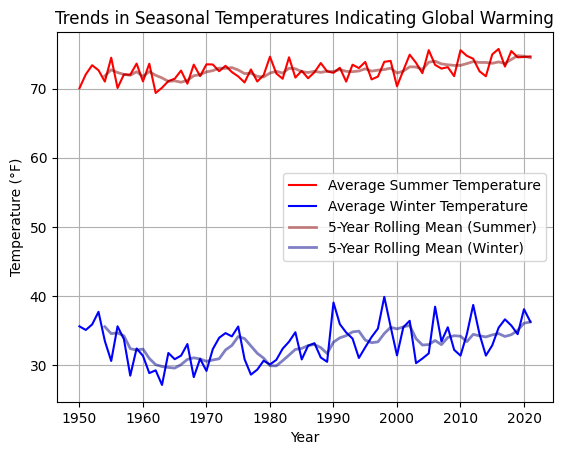

In [12]:
%matplotlib inline

plt.plot(summer_df_avg['year'], summer_df_avg['Ftemp'], label='Average Summer Temperature', color='red')
plt.plot(winter_df_avg['year'], winter_df_avg['Ftemp'], label='Average Winter Temperature', color='blue')
plt.plot(summer_df_avg['year'], summer_df_avg['Ftemp_mean'], label='5-Year Rolling Mean (Summer)', color='darkred', linewidth=2, alpha=0.5)
plt.plot(winter_df_avg['year'], winter_df_avg['Ftemp_mean'], label='5-Year Rolling Mean (Winter)', color='darkblue', linewidth=2, alpha=0.5)
plt.title('Trends in Seasonal Temperatures Indicating Global Warming')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid(True)

plt.show()

From the plot, we can see the trend of average summer and winter temperature is gradually increasing from 1970 till 2020. This is consistent to what we would observe from global warming.